# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

## Perform API Calls

In [12]:
# OpenWeatherMap API Key
api_key = "9167a6e9967b888c3630ab5d6b320a2a"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=belushya%20guba
City not found. Skipping...
Processing Record 2 of Set 1 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=nemuro
Processing Record 3 of Set 1 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=port%20elizabeth
Processing Record 4 of Set 1 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 1 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=geraldton
Processing Record 6 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 3 of Set 2 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=mandalgovi
Processing Record 4 of Set 2 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=cayenne
Processing Record 5 of Set 2 | praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=praia
Processing Record 6 of Set 2 | pano aqil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=pano%20aqil
Processing Record 7 of Set 2 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=hithadhoo
Processing Record 8 of Set 2 | chumikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=chumikan
Processing Record 9 of Set 2 | padang
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 6 of Set 3 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=tsihombe
City not found. Skipping...
Processing Record 7 of Set 3 | kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=kutum
Processing Record 8 of Set 3 | rockingham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=rockingham
Processing Record 9 of Set 3 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=cherskiy
Processing Record 10 of Set 3 | sukhumi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=sukhumi
Processing Record 11 of Set 3 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=vaini
Processing Record 12 of Set 3 | vao
http://api.openweathermap.org/da

Processing Record 9 of Set 4 | amantea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=amantea
Processing Record 10 of Set 4 | achisay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=achisay
City not found. Skipping...
Processing Record 11 of Set 4 | nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=nabire
Processing Record 12 of Set 4 | urdzhar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=urdzhar
City not found. Skipping...
Processing Record 13 of Set 4 | chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=chifeng
Processing Record 14 of Set 4 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=egvekinot
Processing Record 15 of Set 4 | guerr

Processing Record 10 of Set 5 | ipora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=ipora
Processing Record 11 of Set 5 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=chokurdakh
Processing Record 12 of Set 5 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=provideniya
Processing Record 13 of Set 5 | opotiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=opotiki
Processing Record 14 of Set 5 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=namibe
Processing Record 15 of Set 5 | keflavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=keflavik
Processing Record 16 of Set 5 | central point
http://api.openweathermap.org/data/2.5

Processing Record 14 of Set 6 | tolmin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=tolmin
Processing Record 15 of Set 6 | buluang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=buluang
Processing Record 16 of Set 6 | lexington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=lexington
Processing Record 17 of Set 6 | chaoyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=chaoyang
Processing Record 18 of Set 6 | dien bien
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=dien%20bien
City not found. Skipping...
Processing Record 19 of Set 6 | dombarovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=dombarovskiy
Processing Record 20 of Set 6 | kaka
http://ap

Processing Record 18 of Set 7 | ocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=ocos
Processing Record 19 of Set 7 | rio cuarto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=rio%20cuarto
Processing Record 20 of Set 7 | port-gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=port-gentil
Processing Record 21 of Set 7 | sao miguel dos campos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=sao%20miguel%20dos%20campos
Processing Record 22 of Set 7 | azanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=azanka
Processing Record 23 of Set 7 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=bethel
Processing Record 24 of Set 7 | plyussa
http://api.ope

Processing Record 21 of Set 8 | okato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=okato
Processing Record 22 of Set 8 | tazmalt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=tazmalt
Processing Record 23 of Set 8 | ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=ambilobe
Processing Record 24 of Set 8 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=hamilton
Processing Record 25 of Set 8 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=torbay
Processing Record 26 of Set 8 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=mehamn
Processing Record 27 of Set 8 | celestun
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 25 of Set 9 | den helder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=den%20helder
Processing Record 26 of Set 9 | marsa matruh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=marsa%20matruh
Processing Record 27 of Set 9 | champerico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=champerico
Processing Record 28 of Set 9 | hokitika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=hokitika
Processing Record 29 of Set 9 | mountain home
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=mountain%20home
Processing Record 30 of Set 9 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=qaqortoq
Processing Record 31 of Set 9 | disraeli
http://ap

Processing Record 28 of Set 10 | gatesville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=gatesville
Processing Record 29 of Set 10 | santa maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=santa%20maria
Processing Record 30 of Set 10 | penzance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=penzance
Processing Record 31 of Set 10 | nieuw amsterdam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=nieuw%20amsterdam
Processing Record 32 of Set 10 | oussouye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=oussouye
Processing Record 33 of Set 10 | rassvet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=rassvet
Processing Record 34 of Set 10 | vaitape
http://ap

Processing Record 32 of Set 11 | salta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=salta
Processing Record 33 of Set 11 | ozernovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=ozernovskiy
Processing Record 34 of Set 11 | qiongshan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=qiongshan
Processing Record 35 of Set 11 | porto novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=porto%20novo
Processing Record 36 of Set 11 | acarau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=acarau
Processing Record 37 of Set 11 | unicov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=unicov
Processing Record 38 of Set 11 | matagami
http://api.openweathermap.org/data

Processing Record 35 of Set 12 | kotri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=kotri
Processing Record 36 of Set 12 | general roca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=general%20roca
Processing Record 37 of Set 12 | lianzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=lianzhou
Processing Record 38 of Set 12 | barroquinha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=barroquinha
Processing Record 39 of Set 12 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=haines%20junction
Processing Record 40 of Set 12 | trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9167a6e9967b888c3630ab5d6b320a2a&q=trairi
Processing Record 41 of Set 12 | katsuura
http://api.o

In [13]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [14]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nemuro,43.32,145.57,30.13,94,0,4.54,JP,1585248345
1,port elizabeth,-33.92,25.57,59.00,67,8,24.16,ZA,1585248345
2,geraldton,-28.77,114.60,73.40,64,18,4.70,AU,1585248345
3,rikitea,-23.12,-134.97,75.42,86,94,19.75,PF,1585248346
4,colares,38.80,-9.45,57.99,47,94,18.97,PT,1585248346


## Latitude vs Temperature Plot

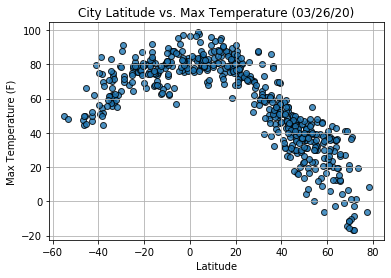

In [15]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

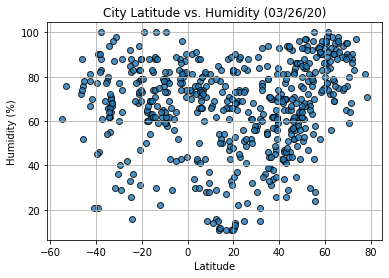

In [16]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

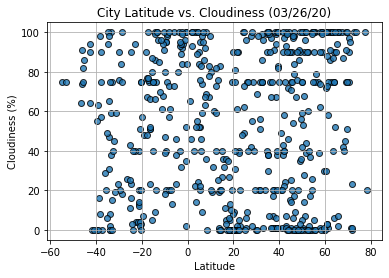

In [17]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

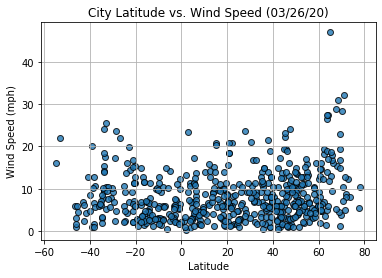

In [18]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()